### 14. Rozkłady oczekiwania na zdarzenie

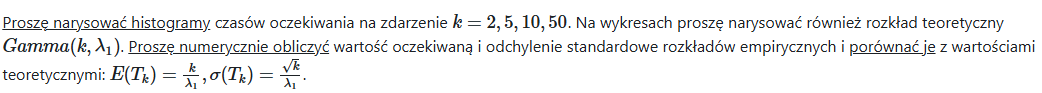

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import gamma

In [2]:
def scotts_bin_width(data):
    std_dev = np.std(data)
    bin_width = 3.49 * std_dev / np.cbrt(len(data)) # Scott's normal reference rule
    n_bins = np.ceil((max(data) - min(data)) / bin_width).astype(int)
    return n_bins

In [3]:
ks = [2, 5, 10, 50]
wait_times = {k: [] for k in ks} # dict.fromkeys(ks, []) - ŹLE # or defaultdict(list)?
n_trajectories = 100000
lambda1 = 1 # one event per minute

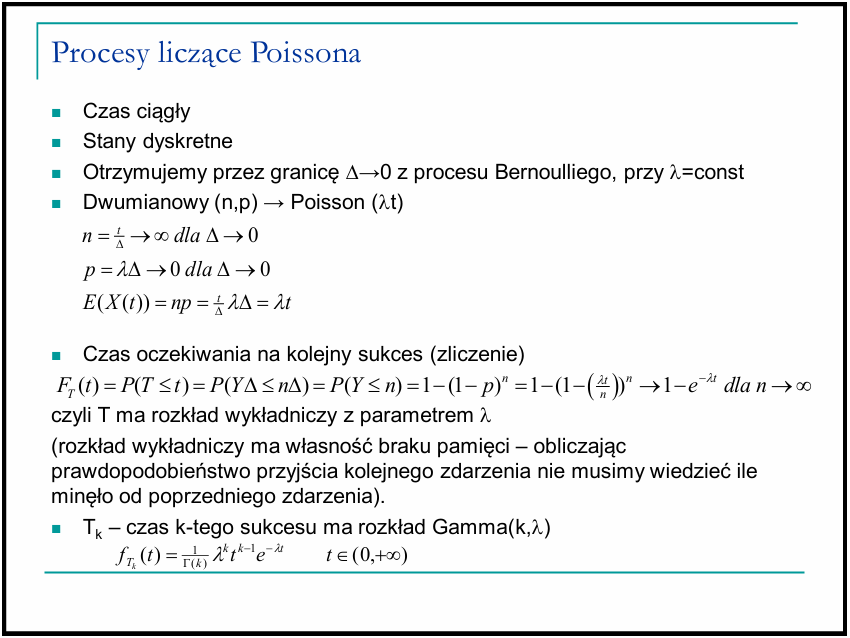

In [4]:
for k in ks:
    for _ in range(n_trajectories):
        wait_time = 0
        for _ in range(k):
            wait_time += random.expovariate(lambda1) # "T ma rozkład wykładniczy z parametrem lambda"
        wait_times[k].append(wait_time)

Histogramy odpowiadają z dużą dokładnością rozkładom teoretycznym Gamma(k, λ).

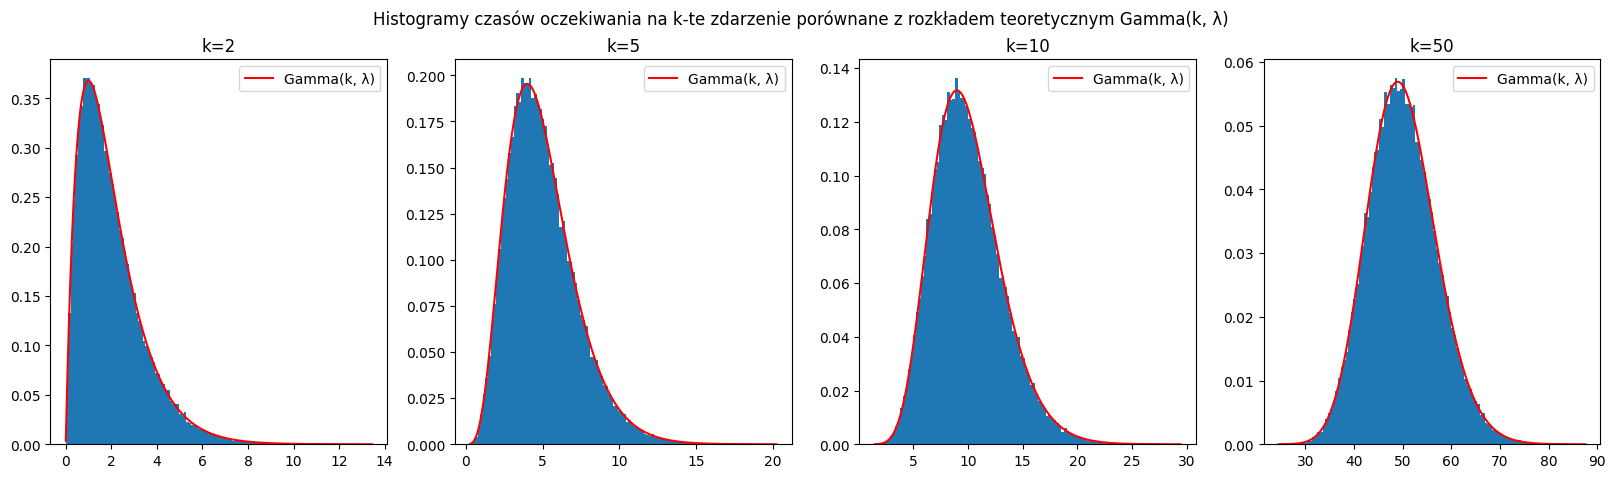

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
fig.suptitle("Histogramy czasów oczekiwania na k-te zdarzenie porównane z rozkładem teoretycznym Gamma(k, λ)")

for ax, k in zip(axes, ks):
    data = wait_times[k]
    n_bins = scotts_bin_width(data)
    ax.set_title(f"k={k}")
    ax.hist(data, density=True, bins=n_bins)

    x = np.linspace(min(data), max(data), 1000)
    y = gamma.pdf(x, a=k, scale=1/lambda1)
    ax.plot(x, y, label='Gamma(k, λ)', c='r')
    ax.legend()

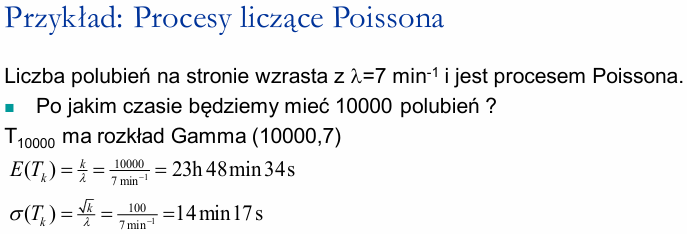

#### Wartość oczekiwana

In [6]:
print("Wartości oczekiwane czasów oczekiwania na k-te zdarzenie oraz wartości oczekiwane rozkładu Gamma(k, λ):")
for k in ks:
    print(f"k={k} \t E(k)={np.average(wait_times[k]):0.3f} \t E(Γ(k, λ))={k/lambda1}")

Wartości oczekiwane czasów oczekiwania na k-te zdarzenie oraz wartości oczekiwane rozkładu Gamma(k, λ):
k=2 	 E(k)=2.003 	 E(Γ(k, λ))=2.0
k=5 	 E(k)=4.999 	 E(Γ(k, λ))=5.0
k=10 	 E(k)=10.002 	 E(Γ(k, λ))=10.0
k=50 	 E(k)=49.997 	 E(Γ(k, λ))=50.0


#### Odchylenie standardowe

In [7]:
print("Odchylenie standardowe czasów oczekiwania na k-te zdarzenie oraz odchylenie standardowe rozkładu Gamma(k, λ):")
for k in ks:
    print(f"k={k} \t std={np.std(wait_times[k]):0.3f} \t σ(Γ(k, λ))={np.sqrt(k)/lambda1:0.3f}")

Odchylenie standardowe czasów oczekiwania na k-te zdarzenie oraz odchylenie standardowe rozkładu Gamma(k, λ):
k=2 	 std=1.419 	 σ(Γ(k, λ))=1.414
k=5 	 std=2.225 	 σ(Γ(k, λ))=2.236
k=10 	 std=3.158 	 σ(Γ(k, λ))=3.162
k=50 	 std=7.089 	 σ(Γ(k, λ))=7.071


Zarówno wartości oczekiwane, jak i odchylenia standardowe są bardzo zbliżone do tych z rozkładu Gamma(k, λ)